# **Project: The Bernstein-Vazirani Algorithm**

## **1. Introduction**
The **Bernstein-Vazirani Algorithm** is a fundamental quantum algorithm that demonstrates a clear advantage over classical computing.

**The Problem:**
Imagine a "black box" function (an Oracle) that contains a secret binary string, $s$.
$$f(x) = s \cdot x \pmod 2$$

* **Classically:** To find an $n$-bit secret string, you need to query the oracle **$n$ times**.
* **Quantumly:** Using this algorithm, we can find the secret string with **exactly 1 query**, regardless of the size of the string.

In [6]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

SECRET_STRING = input()
n = len(SECRET_STRING)

print(f"Target Secret String: {SECRET_STRING}")
print(f"Qubits required: {n} data qubits + 1 auxiliary qubit")

101010101010
Target Secret String: 101010101010
Qubits required: 12 data qubits + 1 auxiliary qubit


## **2. Building the Quantum Oracle**

The core of the algorithm is the Oracle ($U_f$).
In our circuit, we simulate this function using **CNOT gates**.
* If a bit in the secret string is `1`, we place a **Controlled-NOT** gate between the corresponding input qubit and the target qubit.
* This "kicks back" the phase change required for the algorithm to work.

In [7]:
def create_bv_oracle(n, s):
    """
    Creates the Bernstein-Vazirani Oracle for a secret string 's'.
    """
    oracle_qc = QuantumCircuit(n + 1)

    # Reverse the string because Qiskit uses little-endian ordering (0 is rightmost)
    s = s[::-1]

    for i in range(n):
        if s[i] == '1':
            # Apply a CNOT gate
            # Control: Input qubit 'i'
            # Target:  The last qubit (the helper/auxiliary qubit)
            oracle_qc.cx(i, n)

    # Convert to a gate to make it look like a "Black Box" in the diagram
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle U_f"
    return oracle_gate

# Instantiate the oracle for our specific string
bv_oracle = create_bv_oracle(n, SECRET_STRING)

## **3. Constructing the Circuit**

The algorithm follows these specific steps:

1.  **Initialization:** Start with data qubits in state $|0\rangle$ and the auxiliary qubit in state $|-\rangle$.

2.  **Superposition:** Apply **Hadamard (H) gates** to all data qubits.

3.  **Oracle Query:** Apply the Oracle gate exactly once.

4.  **Interference:** Apply **Hadamard (H) gates** again to all data qubits.

5.  **Measurement:** Measure the data qubits to reveal the secret string.

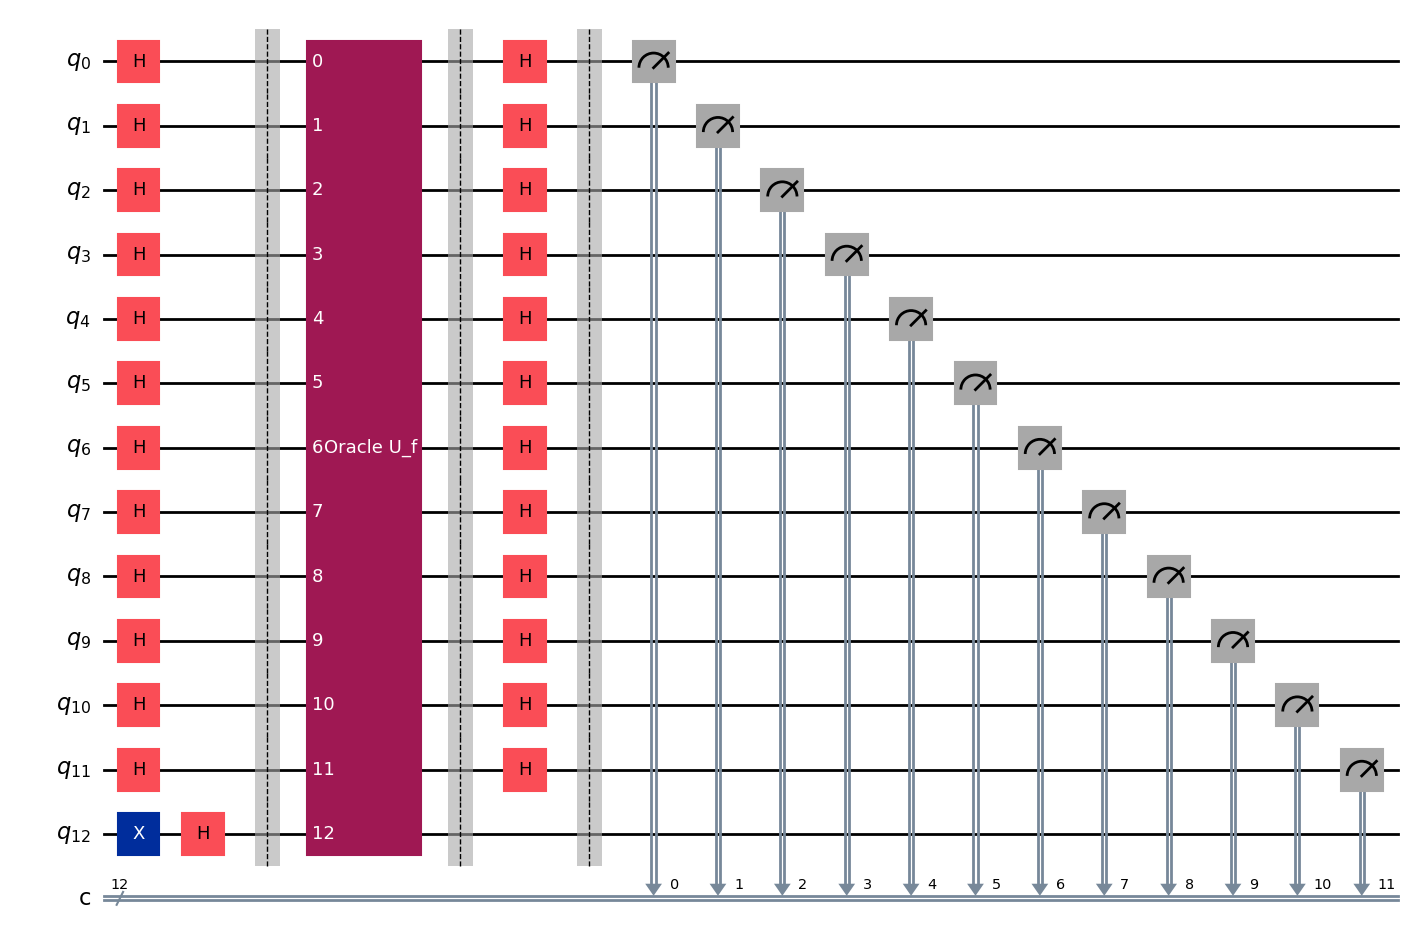

In [8]:
# Create the Main Quantum Circuit
# n data qubits, 1 auxiliary qubit, and n classical bits for measurement
qc = QuantumCircuit(n + 1, n)


qc.x(n)
qc.h(n)
qc.h(range(n))
qc.barrier()
qc.append(bv_oracle, range(n + 1))
qc.barrier()
qc.h(range(n))
qc.barrier()
qc.measure(range(n), range(n))
qc.draw(output='mpl')

## **4. Simulation and Results**

We will now run the circuit on a quantum simulator (`AerSimulator`).

**Expected Output:**
Since the Bernstein-Vazirani algorithm is **deterministic**, we expect 100% of the measurement "shots" to result in our secret string.

The histogram below provides the visual proof.

Original Secret String: 101010101010
Measured String:101010101010

Histogram:


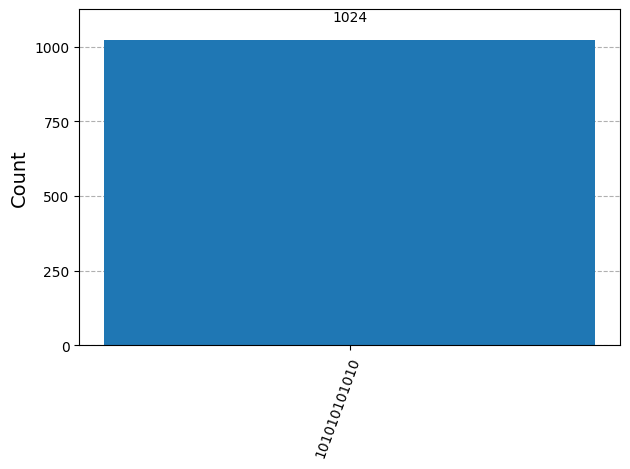

In [9]:
# 1. Setup the simulator
simulator = AerSimulator()

# 2. Compile and Run the circuit
# We run it 1024 times (shots) to verify consistency
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# 3. Get Counts
counts = result.get_counts()

# 4. Analyze Result
measured_str = list(counts.keys())[0]

print(f"Original Secret String: {SECRET_STRING}")
print(f"Measured String:{measured_str}")


# 5. Visual Output
print("\nHistogram:")
plot_histogram(counts)